In [4]:
# Python code for connecting to MySQL database using mysql-connector-python

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with
#actual credentials
connection = mysql.connector.connect(
user='root',
password='1014',
host='localhost',
database='ecommerce'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
#printing first 5 records from each table
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

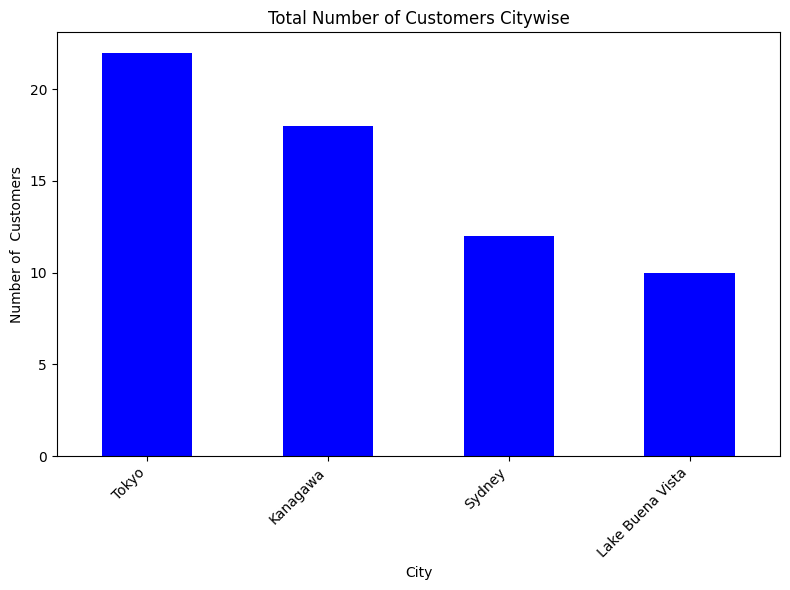

In [12]:
# QUESTION NO:1 Identify the total number of customers City wise.

city_counts= customer_data['city'].value_counts()

  #Ploting the bar graph
plt.figure(figsize=(8,6))
city_counts.plot(kind='bar', color= 'blue')
plt.title('Total Number of Customers Citywise')
plt.xlabel('City')
plt.ylabel('Number of  Customers')
plt.xticks(rotation=45, ha= 'right') # Rotate city names for better readability
plt.tight_layout()   # Adjust layout to prevent clipping of labels
plt.show()

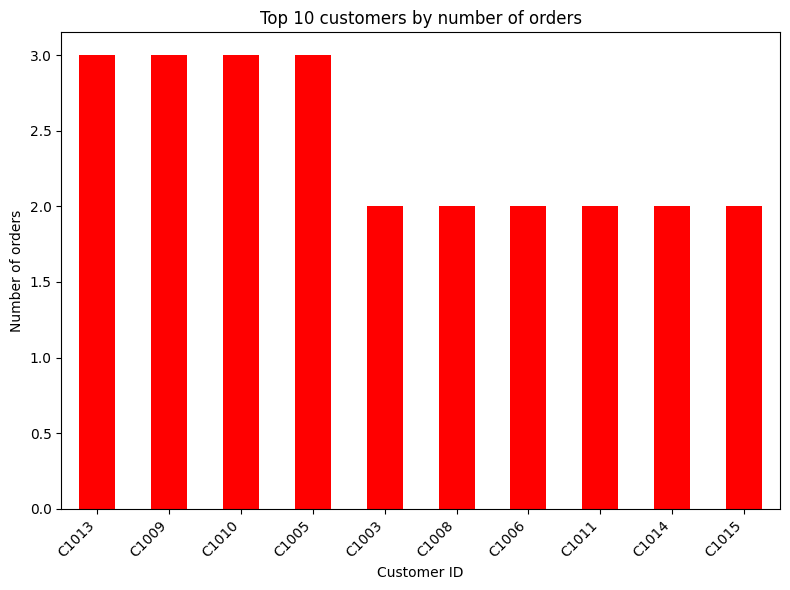

In [6]:
# QUESTION NO:3 Identify the most frequent customers based on their order history.

customer_order_counts = order_data['customer_id'].value_counts()

top_10_customers = customer_order_counts.head(10)

plt.figure(figsize=(8,6))
top_10_customers.plot(kind='bar', color= 'red')
plt.title('Top 10 customers by number of orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of orders')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

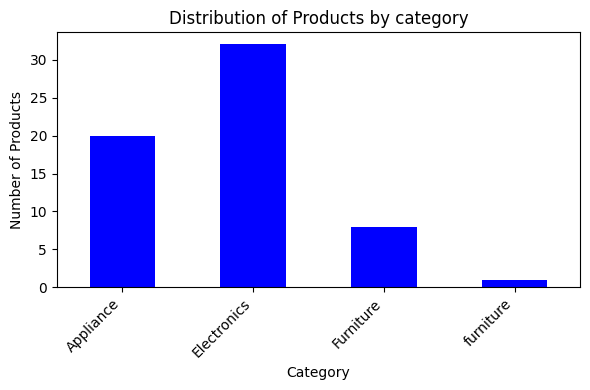

In [15]:
# QUESTION NO:3 Determine the total number of products available by category.

category_counts = product_data.groupby('category').size()
 #Plotting the bar graphs
plt.figure(figsize=(6,4))
category_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Products by category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

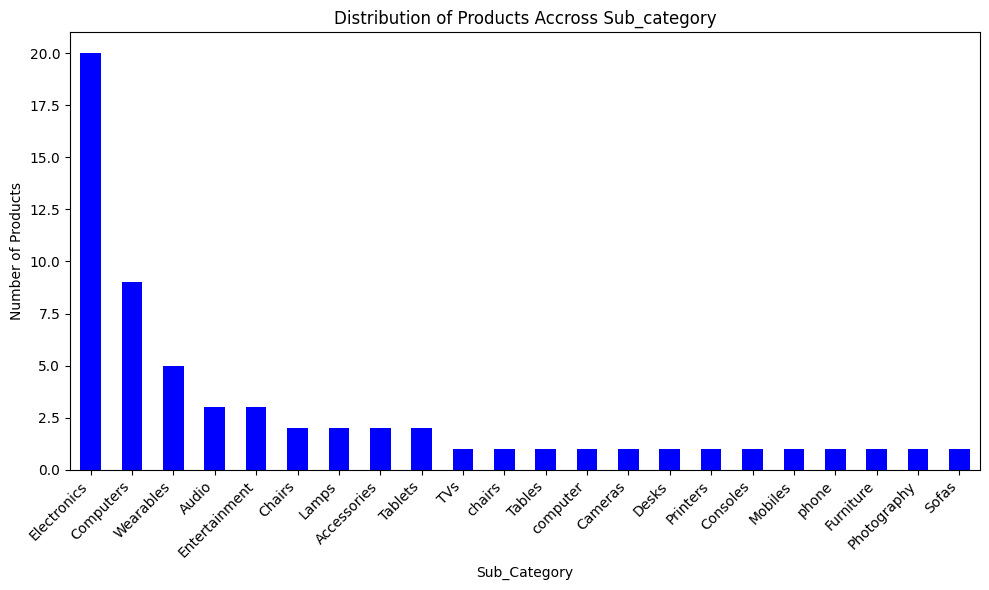

In [9]:
# QUESTION NO:4 Analyze the distribution of products across sub-categories

# Total numbers of product in category
city_counts = product_data['sub_category'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10,6))
city_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Products Accross Sub_category')
plt.xlabel('Sub_Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

   product_id    product_name     category sub_category  original_price  \
0        P102           Chair    furniture       Chairs        20000.00   
46       P148          Tablet  Electronics    Computers        30000.00   
39       P141         Printer  Electronics    Computers        12000.00   
10       P112           chair    Furniture       chairs         1000.00   
30       P132        Sofa Set    Furniture    Furniture        50000.00   
..        ...             ...          ...          ...             ...   
17       P119       Desk Lamp    Furniture        Lamps         3000.00   
1        P103          Laptop  Electronics     computer        60000.00   
23       P125      Smartwatch  Electronics    Wearables        15000.00   
4        P106       Laptop HP  Electronics    Computers        67200.00   
5        P107  Samsung Galaxy  Electronics      Mobiles        60000.99   

    selling_price  stock  
0        15000.00     10  
46       25000.00     10  
39       10000.00 

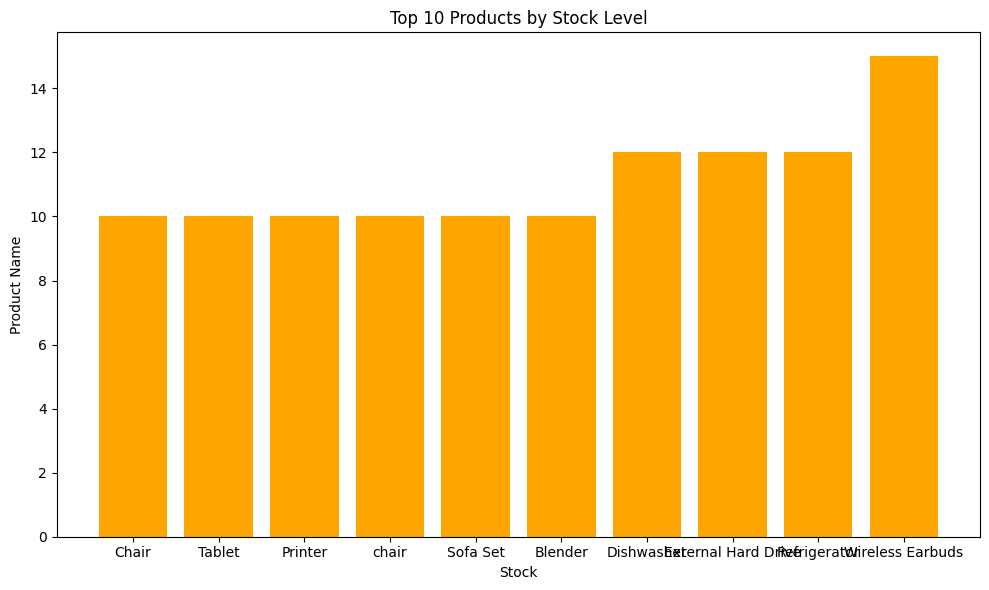

In [21]:
# QUESTION NO:5 Identify products with low stock levels.

sorted_products = product_data.sort_values(by='stock', ascending=True)
print(sorted_products)
top_10_products = sorted_products.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['product_name'], top_10_products['stock'], color='orange')
plt.xlabel('Stock')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Stock Level')
plt.tight_layout()
plt.show()

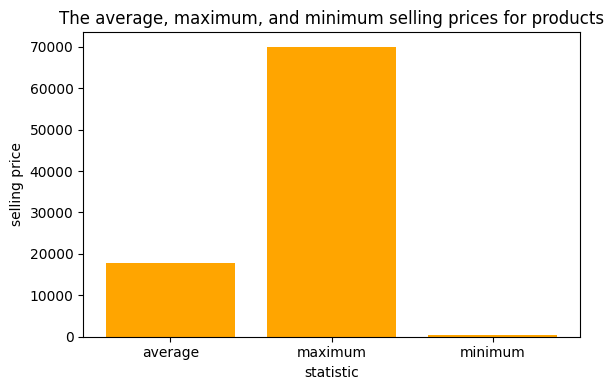

In [20]:
# QUESTION NO:6 Calculate the average, maximum, and minimum selling prices for products.

average_selling_prices=product_data['selling_price'].mean()
maximum_selling_prices=product_data['selling_price'].max()
minimum_selling_prices=product_data['selling_price'].min()

plt.figure(figsize=(6,4))
plt.bar(['average', 'maximum','minimum'],[average_selling_prices,maximum_selling_prices,minimum_selling_prices], color=['orange'])
plt.xlabel('statistic')
plt.ylabel('selling price')
plt.title('The average, maximum, and minimum selling prices for products')
plt.tight_layout()
plt.show()


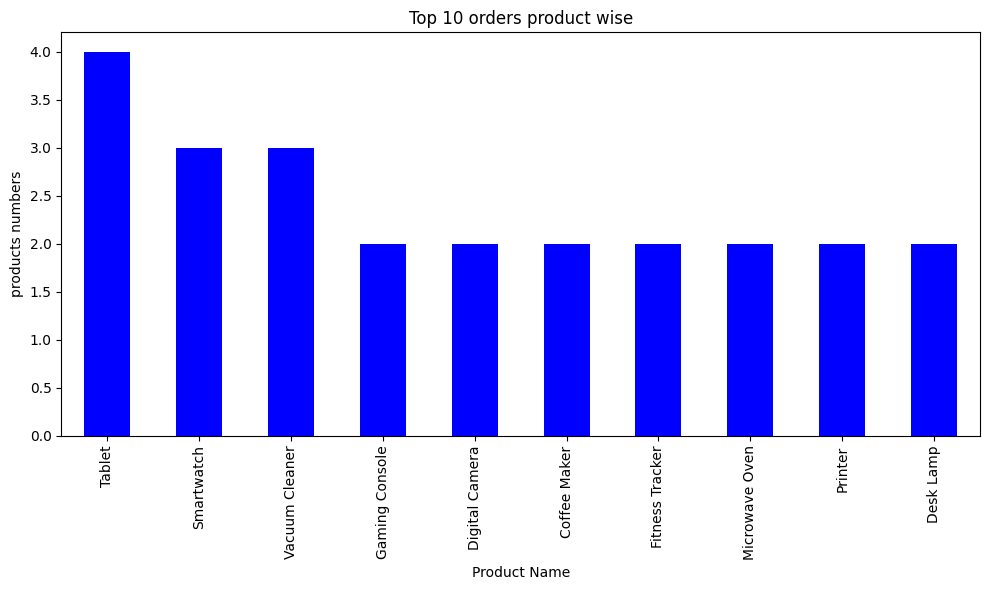

In [74]:
# QUESTION NO:7 Calculate the top 10 orders product wise

top_10_order_products = product_data['product_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_order_products.plot(kind='bar',color='blue')
plt.xlabel('Product Name')
plt.ylabel('products numbers')
plt.title('Top 10 orders product wise')
plt.tight_layout()
plt.show()

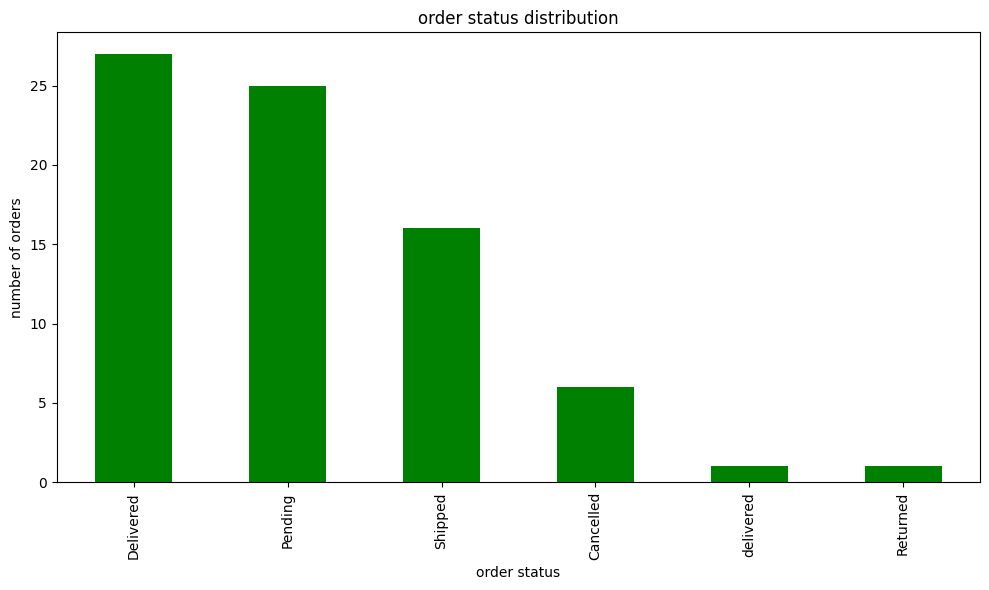

In [18]:
# QUESTION NO:8 Analyze the order status distribution (e.g., pending, delivered)

order_status= order_data['order_status'].value_counts()

plt.figure(figsize=(10, 6))
order_status.plot(kind='bar',color='green')
plt.xlabel('order status')
plt.ylabel('number of orders')
plt.title('order status distribution')
plt.tight_layout()
plt.show()

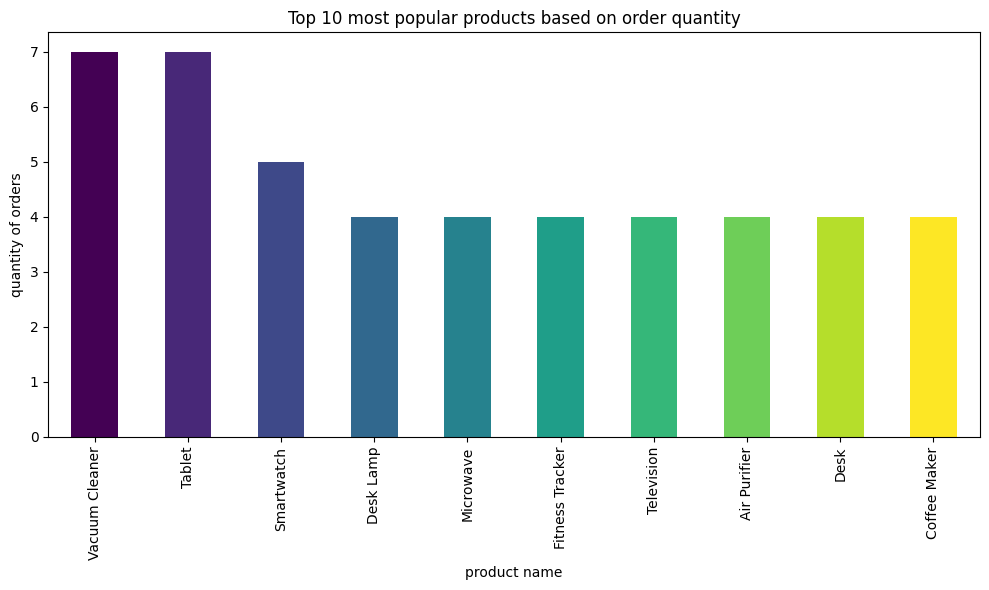

In [79]:
# QUESTION NO:9 Identify the most popular products based on order quantity.
marged_data=pd.merge(order_data,product_data,on='product_id',how='left')

product_quantity=marged_data.groupby('product_name')['quantity'].sum()

popular_product=product_quantity.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
popular_product.plot(kind='bar',color=plt.cm.viridis(np.linspace(0, 1, len(popular_product))))
plt.xlabel('product name')
plt.ylabel('quantity of orders')
plt.title('Top 10 most popular products based on order quantity')
plt.tight_layout()
plt.show()

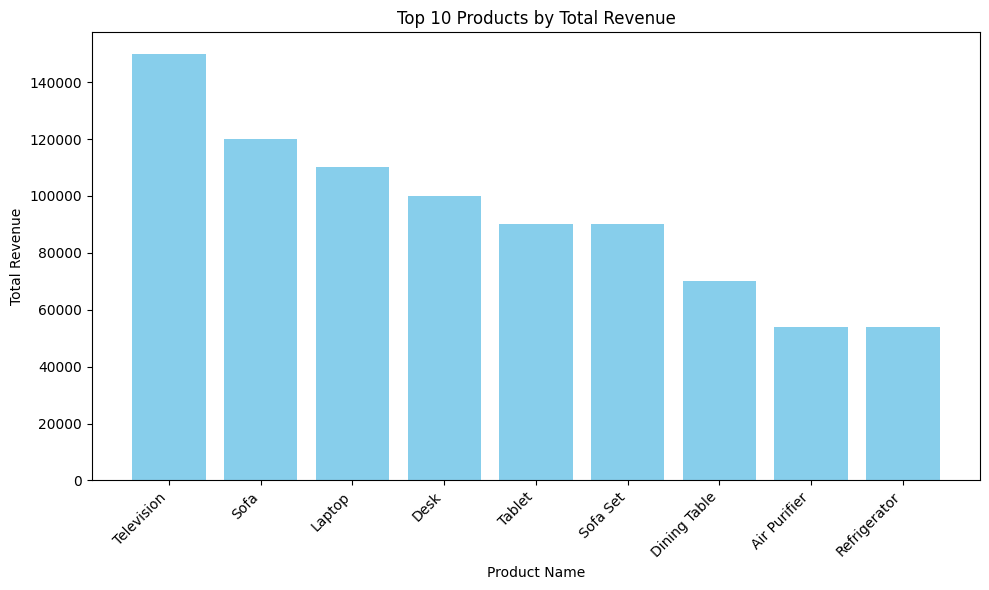

In [33]:
# QUESTION NO:10 Calculate total revenue generated from orders product wise.

merged_data = pd.merge(order_data, product_data, on='product_id', how='left')

merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Calculate total revenue product-wise
product_revenue = merged_data.groupby('product_id')['revenue'].sum().reset_index()

# Merge product_revenue with product_data to get product names
product_revenue = pd.merge(product_revenue, product_data[['product_id', 'product_name']], on='product_id', how='left')

# Sort products by total revenue
product_revenue_sorted = product_revenue.sort_values(by='revenue', ascending=False)


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(product_revenue_sorted['product_name'][:10], product_revenue_sorted['revenue'][:10], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


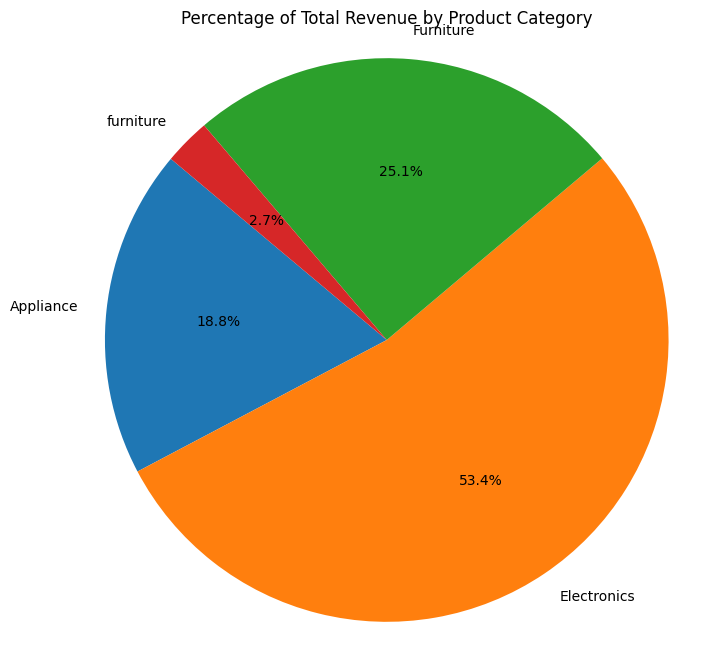

In [42]:
# QUESTION NO:11 Calculate total revenue product category wise percentage


# Merge order_data with product_data to get product details including category for each order
merged_data = pd.merge(order_data, product_data, on='product_id', how='left')

# Calculate revenue for each order
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Calculate total revenue for each product category
category_revenue = merged_data.groupby('category')['revenue'].sum()

# Calculate percentage revenue for each category
category_percentage = (category_revenue / category_revenue.sum()) * 100

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(category_percentage, labels=category_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Revenue by Product Category')
plt.axis('equal') 
plt.show()



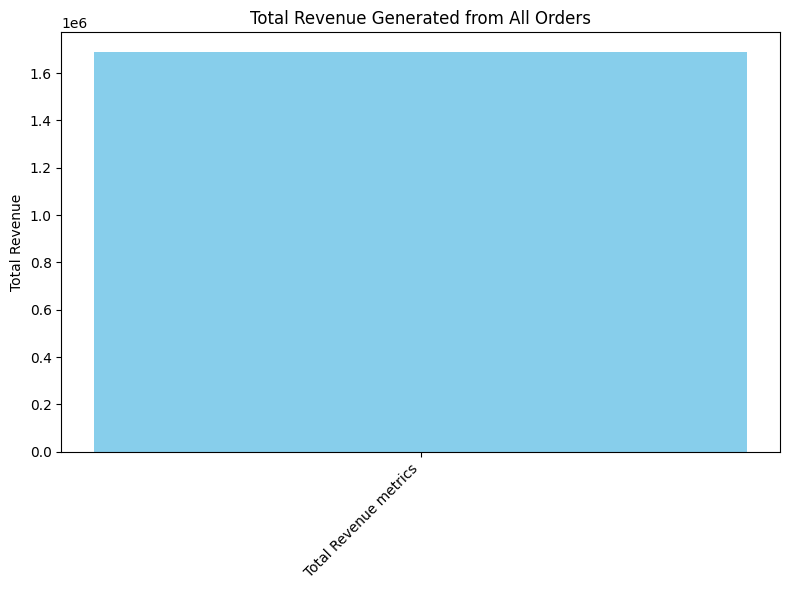

In [45]:
# QUESTION NO:12 Calculate the total revenue generated from all orders

# Calculate total revenue generated from all orders
total_revenue = merged_data['revenue'].sum()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar('Total Revenue metrics', total_revenue, color='skyblue')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated from All Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


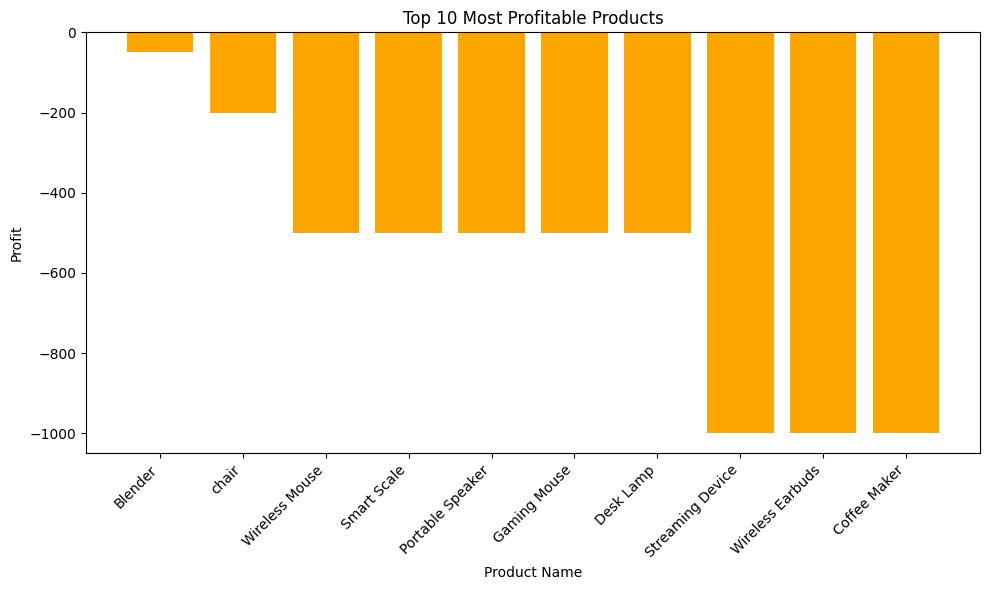

In [46]:
# QUESTION NO:13 Identify the most profitable products based on the difference between original and selling prices.

# Calculate profit for each product
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

# Sort products based on profit in descending order
most_profitable_products = product_data.sort_values(by='profit', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(most_profitable_products['product_name'][:10], most_profitable_products['profit'][:10], color='orange')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.title('Top 10 Most Profitable Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


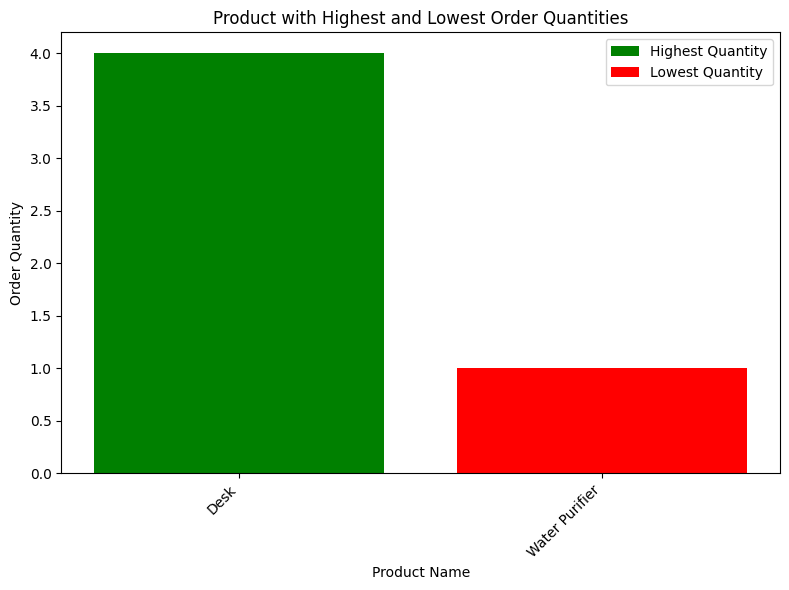

In [52]:
# QUESTION NO:14 Identify product names with the highest and lowest order quantities.


product_quantity = order_data.groupby('product_id')['quantity'].sum().reset_index()

product_quantity = pd.merge(product_quantity, product_data[['product_id', 'product_name']], on='product_id', how='left')

# Sort products by quantity in descending order to get the product with the highest order quantity
highest_quantity_product = product_quantity.sort_values(by='quantity', ascending=False).iloc[0]

# Sort products by quantity in ascending order to get the product with the lowest order quantity
lowest_quantity_product = product_quantity.sort_values(by='quantity', ascending=True).iloc[0]


plt.figure(figsize=(8, 6))


plt.bar(highest_quantity_product['product_name'], highest_quantity_product['quantity'], color='green', label='Highest Quantity')


plt.bar(lowest_quantity_product['product_name'], lowest_quantity_product['quantity'], color='red', label='Lowest Quantity')

plt.xlabel('Product Name')
plt.ylabel('Order Quantity')
plt.title('Product with Highest and Lowest Order Quantities')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


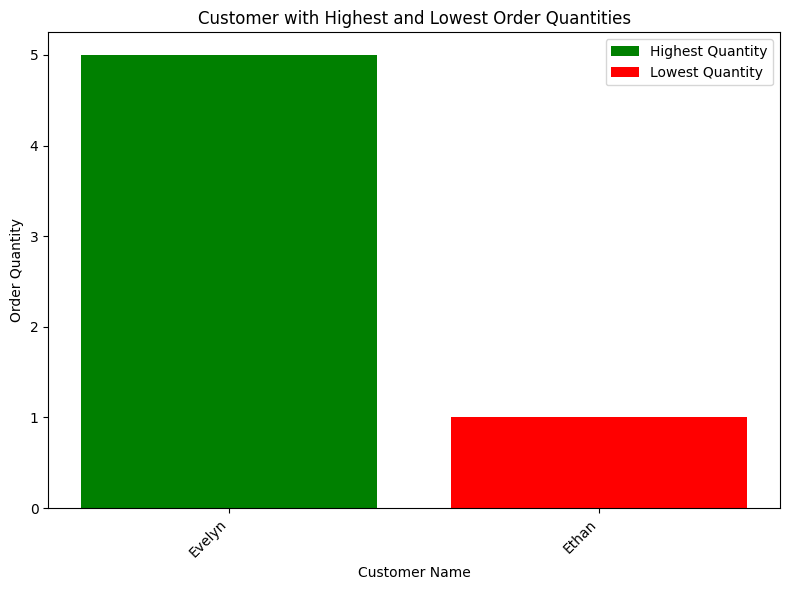

In [66]:
# QUESTION NO:15 Identify customers with the highest and lowest order quantities by customer name.


customer_quantity = order_data.groupby('customer_id')['quantity'].sum().reset_index()


customer_quantity = pd.merge(customer_quantity, customer_data[['customer_id', 'name']], on='customer_id', how='left')

# Sort customers by quantity in descending order to get the customer with the highest order quantity
highest_quantity_customer = customer_quantity.sort_values(by='quantity', ascending=False)

# Sort customers by quantity in ascending order to get the customer with the lowest order quantity
lowest_quantity_customer = customer_quantity.sort_values(by='quantity', ascending=True)


plt.figure(figsize=(8, 6))

# Plot highest quantity customer
plt.bar(highest_quantity_customer['name'][:1], highest_quantity_customer['quantity'][:1], color='green', label='Highest Quantity')

# Plot lowest quantity customer
plt.bar(lowest_quantity_customer['name'][:1], lowest_quantity_customer['quantity'][:1], color='red', label='Lowest Quantity')

plt.xlabel('Customer Name')
plt.ylabel('Order Quantity')
plt.title('Customer with Highest and Lowest Order Quantities')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

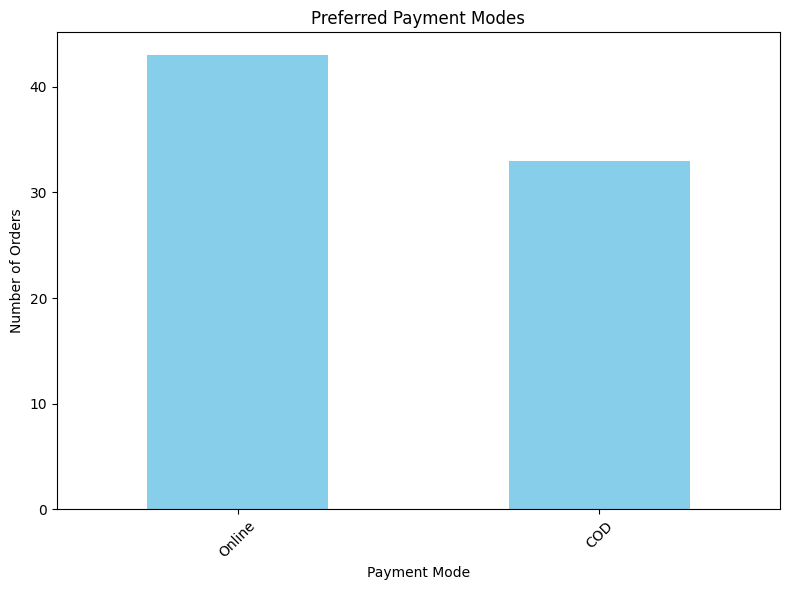

In [68]:
# QUESTION NO:16 Determine the most preferred payment modes.

# Group the order details by payment_mode and count the number of orders for each mode
payment_modes = order_data['payment_mode'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
payment_modes.plot(kind='bar', color='skyblue')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Preferred Payment Modes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

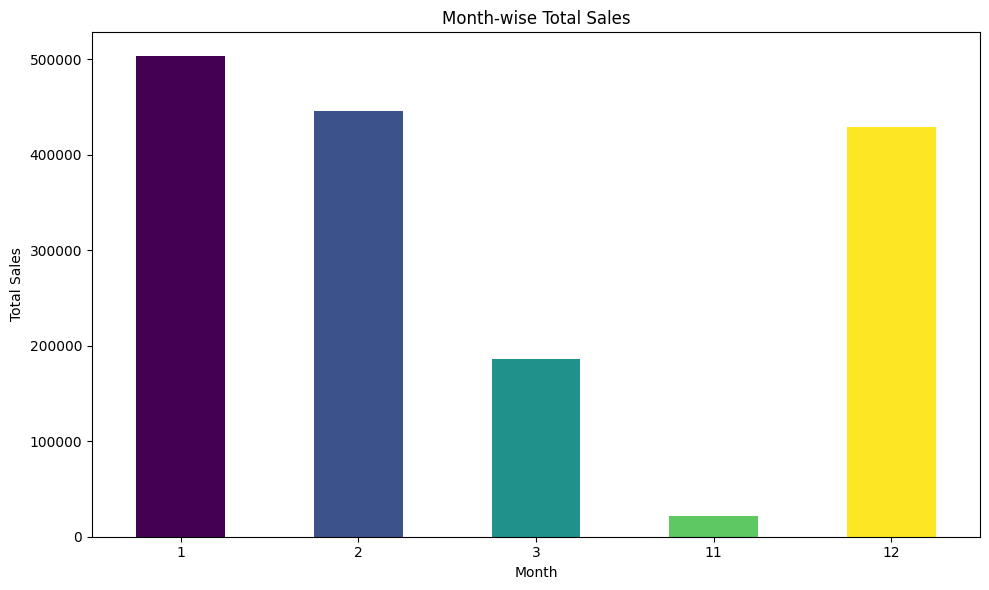

In [76]:
# QUESTION NO:17 Time-based Analysis:   Month wise total sales

# Extract month from the order_date
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
order_data['month'] = order_data['order_date'].dt.month

# Group orders by month and calculate total sales for each month
monthly_sales = order_data.groupby('month')['total_price'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(monthly_sales))))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

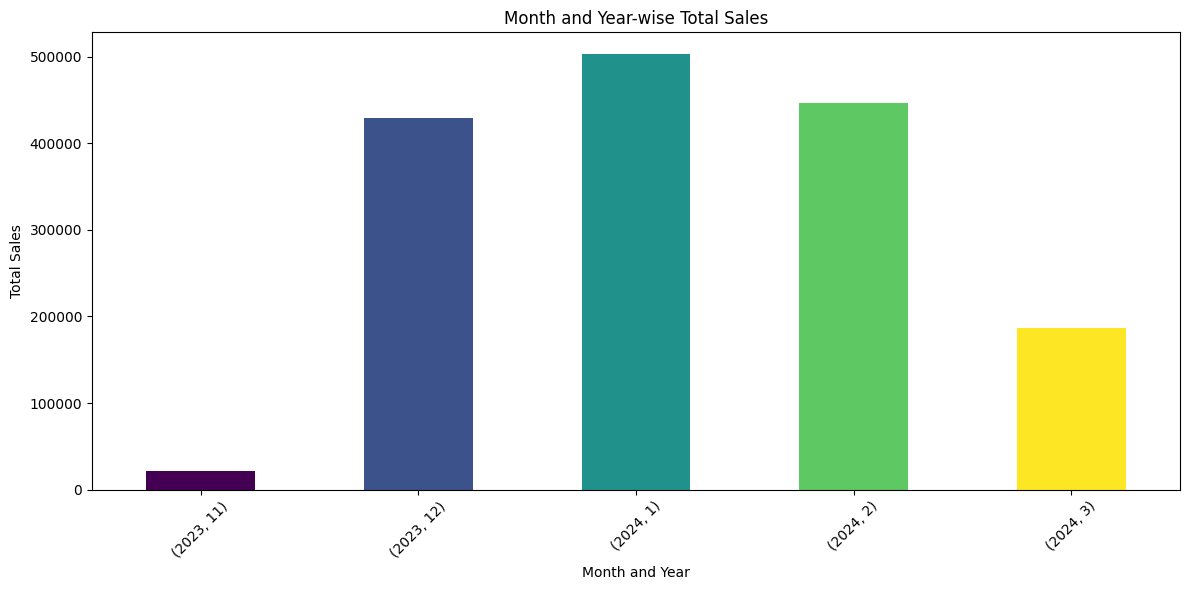

In [80]:
# QUESTION NO:18 Month and year wise total sales

# Extract month and year from the order_date
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
order_data['month'] = order_data['order_date'].dt.month
order_data['year'] = order_data['order_date'].dt.year

# Group orders by month and year and calculate total sales for each month and year
monthly_sales = order_data.groupby(['year', 'month'])['total_price'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(monthly_sales))))
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

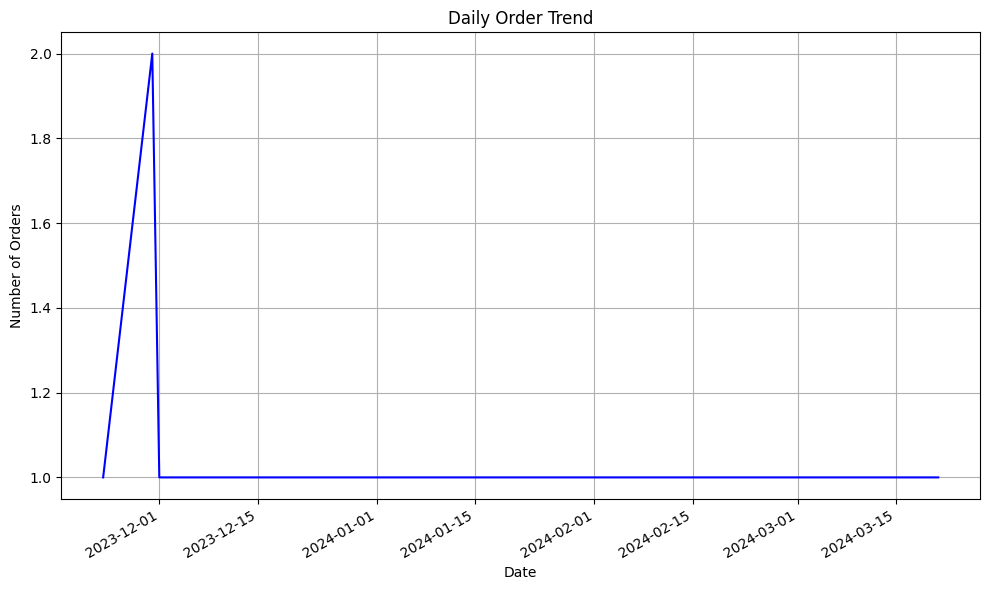

In [89]:
# QUESTION NO:19 Identify peak order date.

# Convert the order_date to datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Group orders by order_date and count the number of orders for each date
daily_orders = order_data.groupby('order_date').size()

# Plotting
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='line', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Daily Order Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

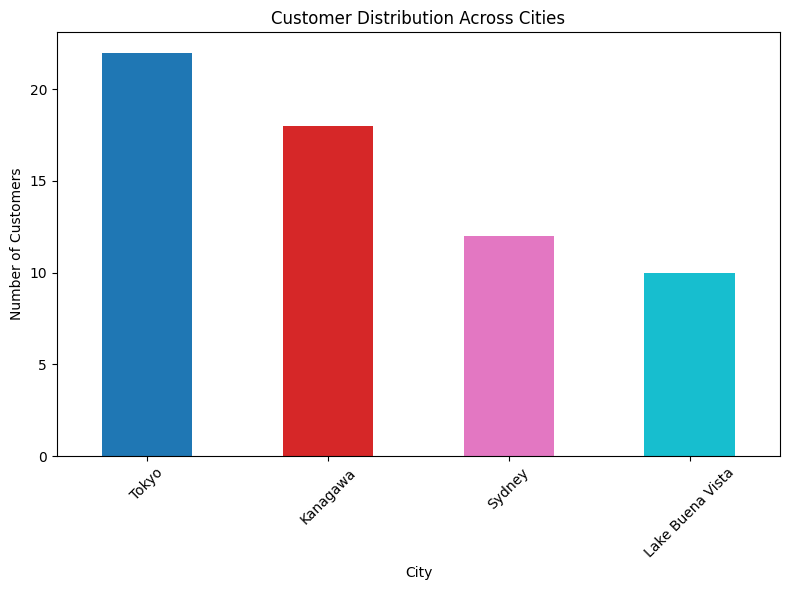

In [91]:
# QUESTION NO:20 Geographical Analysis:  Explore the distribution of customers across different cities.

# Count the number of customers in each city
city_distribution = customer_data['city'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
city_distribution.plot(kind='bar', color=plt.cm.tab10(np.linspace(0, 1, len(city_distribution))))
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution Across Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


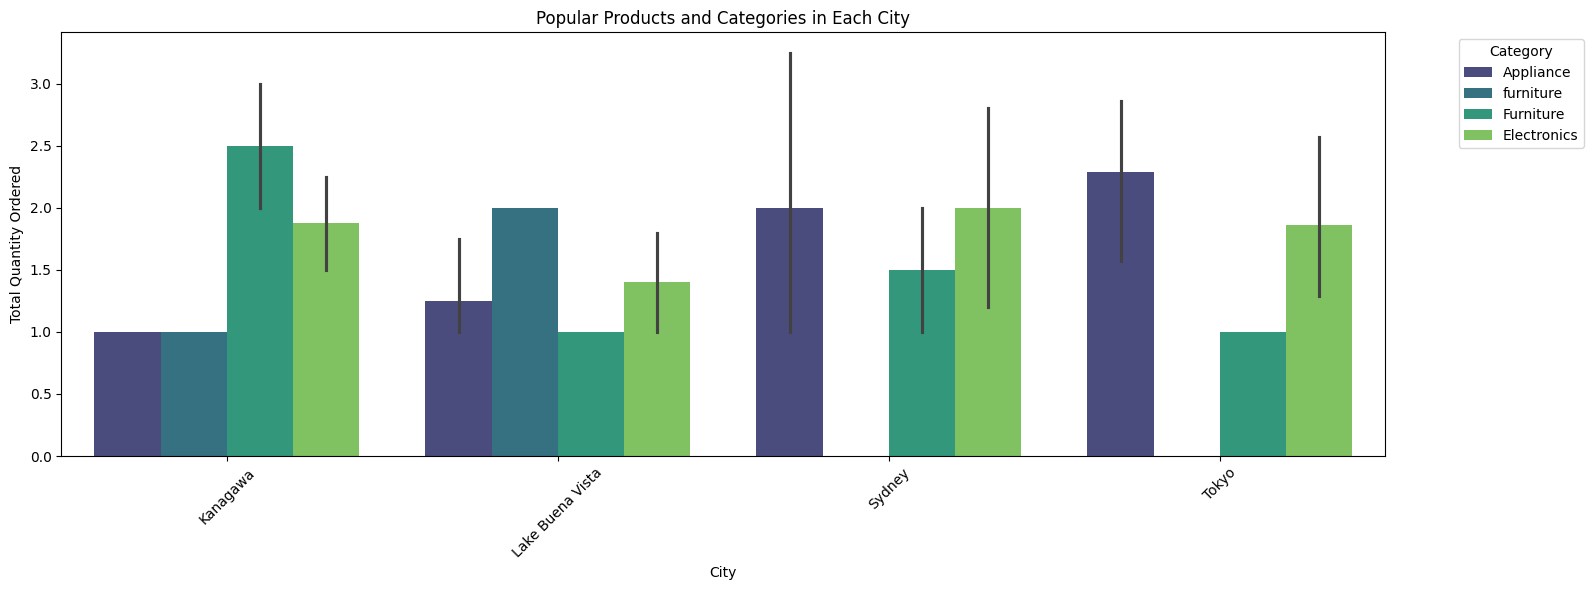

In [95]:
# QUESTION NO:21 Analyze whether certain products or categories are more popular in a specific city.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


order_product_data = pd.merge(order_data, product_data, on='product_id', how='left')

# Merge order data with customer data to get city information
order_customer_data = pd.merge(order_product_data, customer_data, on='customer_id', how='left')

# Group by city, product name, and category, and calculate total quantity ordered for each combination
city_product_category_quantity = order_customer_data.groupby(['city', 'product_name', 'category'])['quantity'].sum().reset_index()


plt.figure(figsize=(16, 6))


sns.barplot(data=city_product_category_quantity, x='city', y='quantity', hue='category', palette='viridis')
plt.xlabel('City')
plt.ylabel('Total Quantity Ordered')
plt.title('Popular Products and Categories in Each City')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\beaut\AppData\Local\Temp\ipykernel_5596\3107846159.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_selling_products.head(10), x='product_name', y='quantity', palette='viridis')


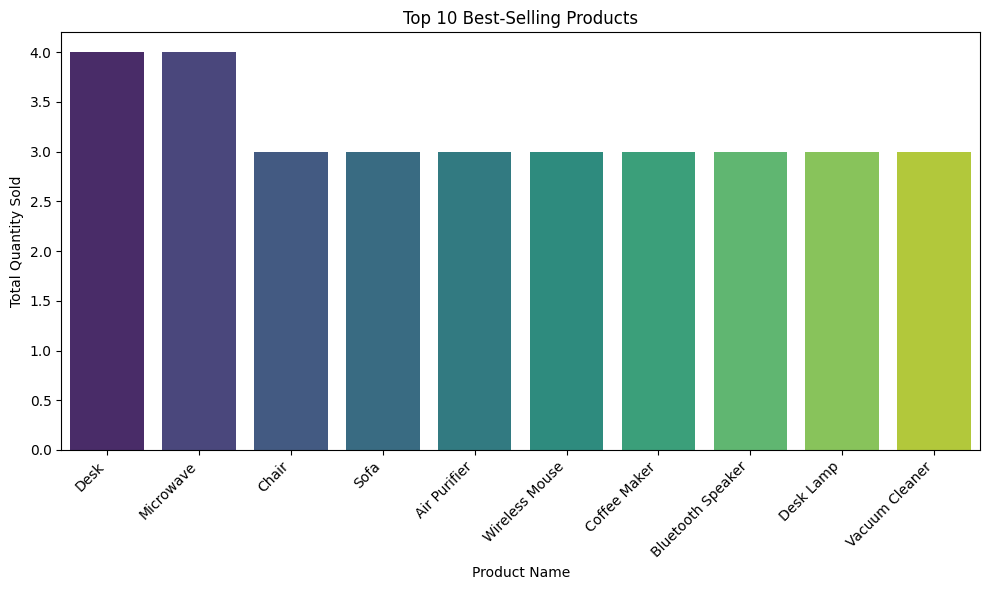

In [96]:
# QUESTION NO:22 Identify the best-selling products.


product_quantity_sold = order_data.groupby('product_id')['quantity'].sum().reset_index()

# Merge with the product_data to get product names
product_quantity_sold = pd.merge(product_quantity_sold, product_data[['product_id', 'product_name']], on='product_id', how='left')

# Sort products by quantity sold in descending order to identify the best-selling products
best_selling_products = product_quantity_sold.sort_values(by='quantity', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=best_selling_products.head(10), x='product_name', y='quantity', palette='viridis')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\beaut\AppData\Local\Temp\ipykernel_5596\4126539950.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=slow_moving_products.head(10), x='product_name', y='quantity', palette='viridis')


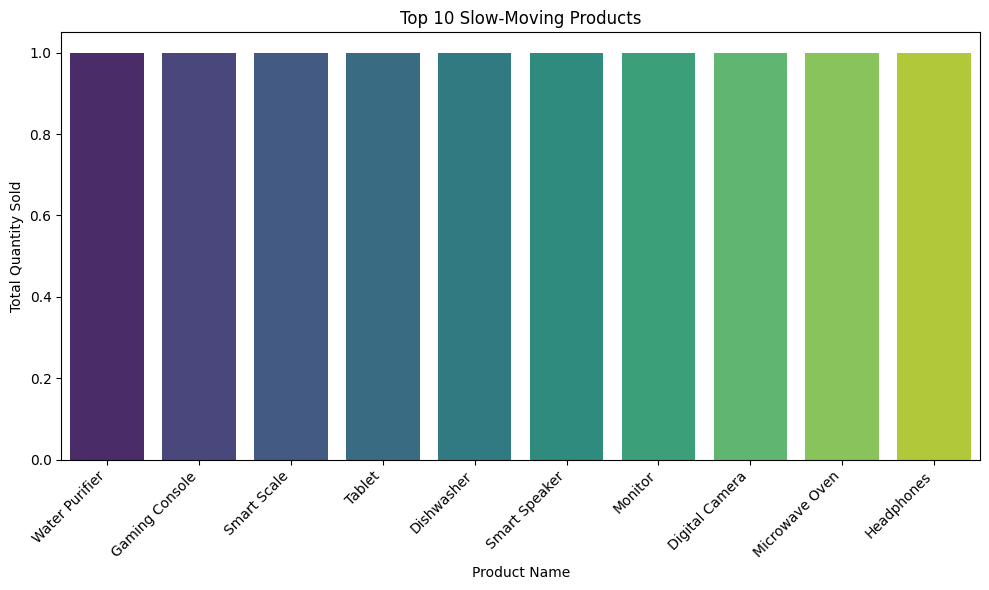

In [97]:
# QUESTION NO:23 Identify top 10 slow-moving products based on low sales.


product_quantity_sold = order_data.groupby('product_id')['quantity'].sum().reset_index()

# Merge with the product_data to get product names
product_quantity_sold = pd.merge(product_quantity_sold, product_data[['product_id', 'product_name']], on='product_id', how='left')

# Sort products by quantity sold in ascending order to identify the slow-moving products
slow_moving_products = product_quantity_sold.sort_values(by='quantity', ascending=True)


plt.figure(figsize=(10, 6))
sns.barplot(data=slow_moving_products.head(10), x='product_name', y='quantity', palette='viridis')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Slow-Moving Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

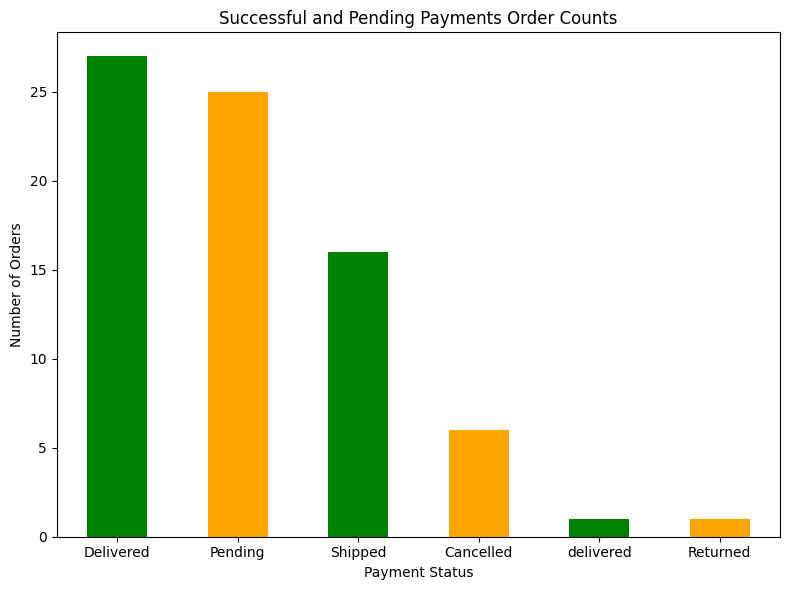

In [99]:
# QUESTION NO: 24 Payment Analysis:  Display successful and pending payments order counts.

# Count the number of successful and pending payments
payment_counts = order_data['order_status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
payment_counts.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('Payment Status')
plt.ylabel('Number of Orders')
plt.title('Successful and Pending Payments Order Counts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()